In [2]:
from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

plot_params = {}
sim_params = {}

plot_params['s']        = 0.2
plot_params['lim1']     = -80
plot_params['lim2']     = 80
plot_params['wnum']     = 1000
plot_params['time_val'] = 0

sim_params['k'] = 43 # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)

g_sweep = np.linspace(0, 0.75*43, plot_params['wnum'])

g_val_num = 0
casc_t = np.zeros((len(g_sweep), plot_params['wnum']), dtype=complex)
for g_value in g_sweep:
    # Cavity 1
    sim_params['k1']    = sim_params['k']/2
    sim_params['k2']    = sim_params['k']/2
    sim_params['gnd']   = 1
    sim_params['g']     = g_value                       # rabi frequency
    sim_params['gamma'] = sim_params['k']/1000           # emitter linewidth
    sim_params['Gc']    = 0                             # additional loss channel
    sim_params['we']    = 0                             # emmiter detuning
    sim_params['wc']    = 0                             # cavity detuning
    sim_params['N']     = 1                             # number of emmiters 
    jvec = np.zeros(int((sim_params['N']-1)*sim_params['N']/2))   
    sim_params['jvec']  = jvec                          # dipole-dipole coupling 
    sim_params['We']    = sim_params['we']*np.ones((1,sim_params['N']))

    pt1 = PhotonTransmission(plot_params, sim_params)
    x_1, y1_1, y2_1 = pt1.calc_first_subspace()

    # Cavity 2
    sim_params['k1']    = sim_params['k']/2
    sim_params['k2']    = sim_params['k']/2
    sim_params['gnd']   = 1
    sim_params['g']     = g_value                       # rabi frequency
    sim_params['gamma'] = sim_params['k']/1000           # emitter linewidth
    sim_params['Gc']    = 0                             # additional loss channel
    sim_params['we']    = 0                             # emmiter detuning
    sim_params['wc']    = 0                             # cavity detuning
    sim_params['N']     = 1                             # number of emmiters    
    jvec = np.zeros(int((sim_params['N']-1)*sim_params['N']/2))
    sim_params['jvec']  = jvec                          # dipole-dipole coupling 
    sim_params['We']    = sim_params['we']*np.ones((1,sim_params['N']))

    pt2 = PhotonTransmission(plot_params, sim_params)
    x_2, y1_2, y2_2 = pt2.calc_first_subspace()

    # Cascaded Transmission Behaviour 
    for j in range(len(y1_1)):
        S1 = np.array([[y1_1[j], np.conj(y2_1[j])], [y2_1[j], np.conj(y1_1[j])]])
        S2 = np.array([[y1_2[j], np.conj(y2_2[j])], [y2_2[j], np.conj(y1_2[j])]])
        
        inter1 = S1@np.array([[1],[0]])
        out = S2@inter1
        
        casc_t[g_val_num][j] = out[0]
    
    g_val_num += 1


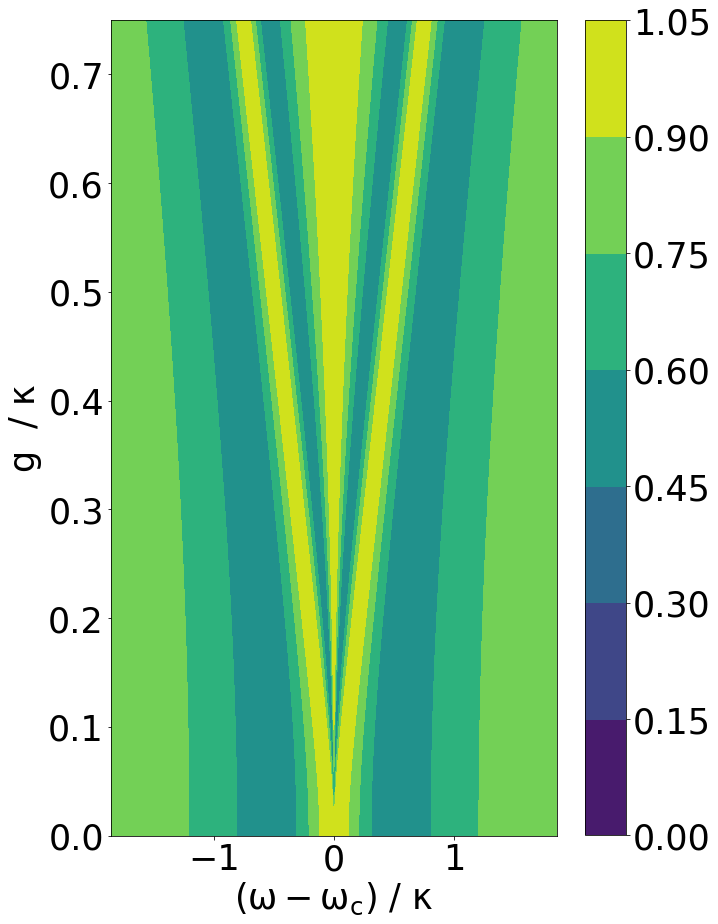

In [3]:
X, G_sweep = np.meshgrid(x_1/sim_params['k'], g_sweep/sim_params['k'])

plt.rcParams.update({'mathtext.default':  'regular' })
plt.rcParams.update({'font.size': 35})
plt.rcParams.update({'mathtext.default':  'regular' })
plt.figure(figsize=(10, 15))
plt.contourf(X, G_sweep, casc_t)
plt.colorbar()
# ax.set_xlabel('Z')
plt.ylabel('$g$  / $\kappa$')
plt.xlabel('$(\omega-\omega_{c})$ / $\kappa$')
plt.savefig('continuous_g.svg')

In [1]:
from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

plot_params = {}
sim_params = {}

plot_params['s']        = 0.2
plot_params['lim1']     = -80
plot_params['lim2']     = 80
plot_params['wnum']     = 1000
plot_params['time_val'] = 0

sim_params['k'] = 43 # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)

g_sweep = [0, 5, 19]

g_val_num = 0
casc_t = np.zeros((len(g_sweep), plot_params['wnum']), dtype=complex)
for g_value in g_sweep:
    # Cavity 1
    sim_params['k1']    = sim_params['k']/2
    sim_params['k2']    = sim_params['k']/2
    sim_params['gnd']   = 1
    sim_params['g']     = g_value                       # rabi frequency
    sim_params['gamma'] = sim_params['k']/1000          # emitter linewidth
    sim_params['Gc']    = 0                             # additional loss channel
    sim_params['we']    = 0                             # emmiter detuning
    sim_params['wc']    = 0                             # cavity detuning
    sim_params['N']     = 1                             # number of emmiters 
    jvec = np.zeros(int((sim_params['N']-1)*sim_params['N']/2))   
    sim_params['jvec']  = jvec                          # dipole-dipole coupling 
    sim_params['We']    = sim_params['we']*np.ones((1,sim_params['N']))

    pt1 = PhotonTransmission(plot_params, sim_params)
    x_1, y1_1, y2_1 = pt1.calc_first_subspace()

    # Cavity 2
    sim_params['k1']    = sim_params['k']/2
    sim_params['k2']    = sim_params['k']/2
    sim_params['gnd']   = 1
    sim_params['g']     = g_value                       # rabi frequency
    sim_params['gamma'] = sim_params['k']/1000           # emitter linewidth
    sim_params['Gc']    = 0                             # additional loss channel
    sim_params['we']    = 0                             # emmiter detuning
    sim_params['wc']    = 0                             # cavity detuning
    sim_params['N']     = 1                             # number of emmiters    
    jvec = np.zeros(int((sim_params['N']-1)*sim_params['N']/2))
    sim_params['jvec']  = jvec                          # dipole-dipole coupling 
    sim_params['We']    = sim_params['we']*np.ones((1,sim_params['N']))

    pt2 = PhotonTransmission(plot_params, sim_params)
    x_2, y1_2, y2_2 = pt2.calc_first_subspace()

    # Cascaded Transmission Behaviour 
    for j in range(len(y1_1)):
        S1 = np.array([[y1_1[j], np.conj(y2_1[j])], [y2_1[j], np.conj(y1_1[j])]])
        S2 = np.array([[y1_2[j], np.conj(y2_2[j])], [y2_2[j], np.conj(y1_2[j])]])
        
        inter1 = S1@np.array([[1],[0]])
        out = S2@inter1
        
        casc_t[g_val_num][j] = out[0]
    
    g_val_num += 1

Text(0.5, 0, '$(\\omega-\\omega_{c})$ / $\\kappa$')

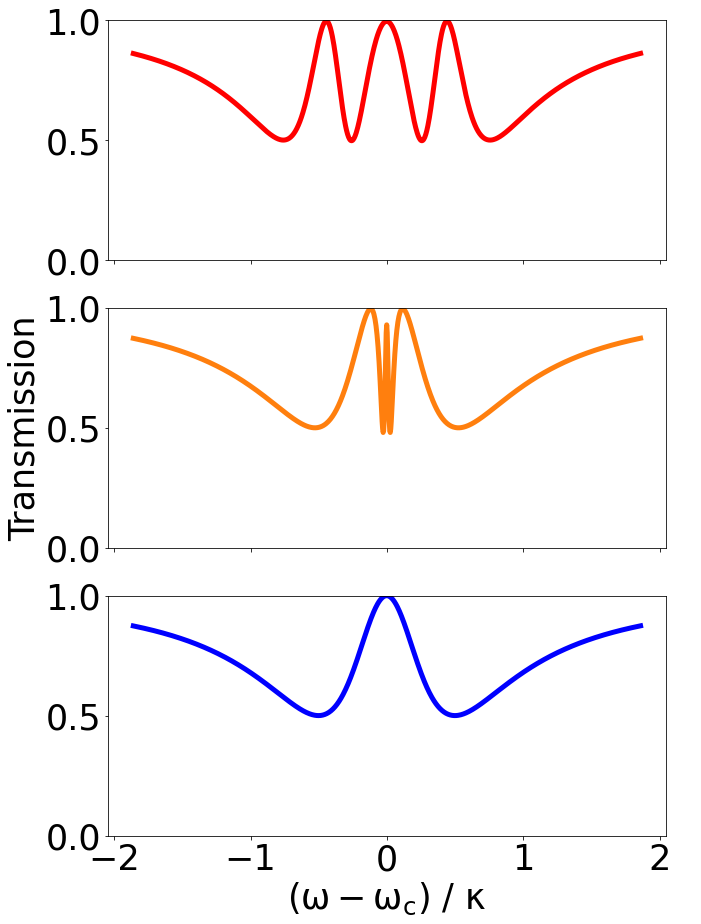

In [4]:
fig, axs = plt.subplots(len(casc_t), sharex=True, sharey=True, figsize=(10, 15))
x = x_1/sim_params['k']

colors = ['b', 'tab:orange', 'r']

for i in range(len(casc_t)):
    axs[(len(casc_t)-1)-i].plot(x, casc_t[i], colors[i], linewidth=5)
    axs[(len(casc_t)-1)-i].set_ylim([0,1])

fig.add_subplot(111, frameon=False)

plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.rcParams.update({'mathtext.default':  'regular' })
plt.rcParams.update({'font.size': 35})
plt.ylabel('Transmission')
plt.xlabel('$(\omega-\omega_{c})$ / $\kappa$')
# plt.savefig('discrete_g.svg')
# fig.rcParams.update({'mathtext.default':  'regular' })
# fig.text('$(\omega-\omega_{c})$ / $\kappa$', ha='center')
# fig.text('Transmission', va='center', rotation='vertical')